## Imports

In [2]:
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
import os
from IPython.display import display, Image
import torch 

In [9]:
roboflow_api = '*************'

In [19]:
try :
    rf = Roboflow(api_key=roboflow_api)
    project = rf.workspace('sperm-motility-analysis-from-microscopic-videos'
                          ).project('full-sperm-cell-detection')
    dataset = project.version(6).download('yolov8')
    dataset_location = dataset.location
    print(f'loaction of dataset: {dataset_location}')
except Exception as e:
    print(f'Error downloading dataset : {e}')


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Full-Sperm-Cell-Detection-6 in yolov8:: 100%|█████| 562/562 [00:00<00:00, 804.82it/s]

loaction of dataset: <roboflow.core.dataset.Dataset object at 0x000001A1DE597EB0>


In [51]:
def explore_dataset(location):
    """Display the dataset information and some sample images"""
    # read datayaml to understand dataset structure 
    data_ymal_path = Path(location)/'data.yaml'
    if not data_ymal_path.exists():
        print(f'data.yaml not found at {data_ymal_path}')
        return
    print('='*30)
    print('Dataset Information')
    print('='*30)

    with open (data_ymal_path, 'r') as f :
        print(f.read())
    train_dir = Path(location)/ 'train'/ 'images'
    val_dir = Path(location)/ 'valid'/ 'images'
    test_dir = Path(location)/ 'test'/ 'images'

    train_count = len(list(train_dir.glob('*.jpg'))) if train_dir.exists() else 0
    val_count = len(list(val_dir.glob('*.jpg'))) if val_dir.exists() else 0
    test_count = len(list(test_dir.glob('*.jpg'))) if test_dir.exists() else 0

    print('='*30)
    print('Dataset Statistics')
    print('='*30)
    print(f"Training images: {train_count}")
    print(f"Validation images: {val_count}")
    print(f"Test images: {test_count}")
    print(f"Total images: {train_count + val_count + test_count}")
    print("=" * 30)  
    print('Sample Training Images')
    print("=" * 30) 
    sample_images = list(train_dir.glob('*.jpg'))[4:7]
    fig,axes = plt.subplots(1,3,figsize=(15,5))
    for idx, img_path in enumerate(sample_images):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f'Sample {idx+1}')
    plt.tight_layout()
    plt.show()
    
    
    

Dataset Information
names:
- sperm
nc: 1
roboflow:
  license: CC BY 4.0
  project: full-sperm-cell-detection
  url: https://universe.roboflow.com/sperm-motility-analysis-from-microscopic-videos/full-sperm-cell-detection/dataset/6
  version: 6
  workspace: sperm-motility-analysis-from-microscopic-videos
test: ../test/images
train: ../train/images
val: ../valid/images

Dataset Statistics
Training images: 240
Validation images: 24
Test images: 11
Total images: 275
Sample Training Images


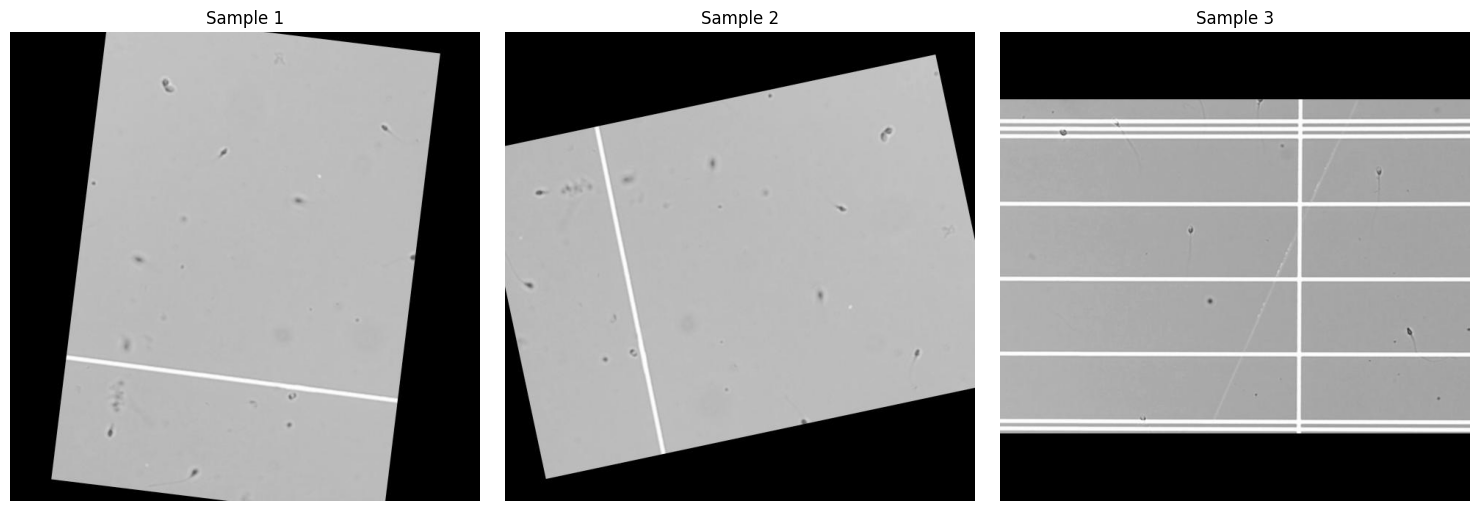

In [53]:
explore_dataset(dataset_location)

In [4]:
def training(dataset_path, epochs=50, img_size=640, model_size='n', batch_size=16):
    '''
    Train YOLOv8 model for Spirm counting
    Args:
    dataset_path: Path for dataset folder
    epochs : Number of training 
    img_size: Size og image
    model_size:  'n', 's', 'm', 'l', or 'x' (nano to xlarge)
    batch_size : Training batch size
    '''
    data_yaml = Path(dataset_path)/'data.yaml'
    if not data_yaml.exists():
        print(f'❌ Error: data.yaml not found at {data_yaml}')
        return
    print('='*60)
    print("STARTING TRAINING")
    print('='*60)
    print(f'Model :YOLOv8{model_size}')
    print(f'Epochs: {epochs}')
    print(f'Image size {img_size}')
    print(f'Batch Size: {batch_size}')
    print(f'Device :{"GPU" if torch.cuda.is_available() else "CPU"} ')
    print('='*60)

    model = YOLO(f'yolov8{model_size}.pt')
    result = model.train(
        data = str(data_yaml),
        epochs = epochs,
        imgsz = img_size, 
        batch = batch_size,
        patience = 15, 
        save= True,
        device = 0 if torch.cuda.is_available() else 'cpu',
        project= 'Sperm_counting',
        name = f'yolov8{model_size}_training',
        plots= True,
        verbose= True   
    )
    print('\n✅ Training completed!')
    print(f'📁 Results saved in: Sperm_counting/yolov8{model_size}_training')
    return model
    

In [8]:
training(dataset_path='./Full-Sperm-Cell-Detection-6/', epochs=50,model_size='m')

STARTING TRAINING
Model :YOLOv8m
Epochs: 50
Image size 640
Batch Size: 16
Device :GPU 
New https://pypi.org/project/ultralytics/8.4.9 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.5  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Full-Sperm-Cell-Detection-6\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

In [4]:
def plot_train_results(result_dir):
    '''plot training '''
    results_csv = Path(result_dir)/'results.csv'
    if not results_csv.exists():
        print(f'❌ Results file not found at {results_csv}')
        return 
    # load results
    df = pd.read_csv(results_csv)
    df.columns = df.columns.str.strip()
    # create plots
    fig, axes = plt.subplots(2,3,figsize=(18,10))
    fig.suptitle('Training Metrics', fontsize= 16,fontweight='bold' )
    
    # Box Loss
    axes[0,0].plot(df['train/box_loss'], label='Train', color='blue')
    axes[0,0].plot(df['val/box_loss'], label='Validation', color='orange')
    axes[0,0].set_title('Box Loss')
    axes[0,0].set_xlabel('Epochs')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    #Class Loss
    axes[0,1].plot(df['train/cls_loss'], label='Train', color='blue')
    axes[0,1].plot(df['val/cls_loss'], label='Validation', color='orange')
    axes[0,1].set_title('Class loss')
    axes[0,1].set_xlabel('Epochs')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # DFL Loss
    axes[0, 2].plot(df['train/dfl_loss'], label='Train', color='blue')
    axes[0, 2].plot(df['val/dfl_loss'], label='Validation', color='orange')
    axes[0, 2].set_title('DFL Loss')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # Precision
    axes[1, 0].plot(df['metrics/precision(B)'], color='green')
    axes[1, 0].set_title('Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Recall
    axes[1, 1].plot(df['metrics/recall(B)'], color='purple')
    axes[1, 1].set_title('Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].grid(True, alpha=0.3)
    
    # mAP
    axes[1, 2].plot(df['metrics/mAP50(B)'], label='mAP@50', color='red')
    axes[1, 2].plot(df['metrics/mAP50-95(B)'], label='mAP@50-95', color='darkred')
    axes[1, 2].set_title('Mean Average Precision')
    axes[1, 2].set_xlabel('Epoch')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    # print final metrics
    print('\n'+ '=' * 60)
    print('FINAL TRAINING METRICS')
    print("=" * 60)
    print(f'Precision: {df["metrics/precision(B)"].iloc[-1]:.3f}')
    print(f'Recall: {df["metrics/recall(B)"].iloc[-1]:.3f}')
    print(f"mAP@50: {df['metrics/mAP50(B)'].iloc[-1]:.3f}")
    print(f"mAP@50-95: {df['metrics/mAP50-95(B)'].iloc[-1]:.3f}")
    print("=" * 60)
    

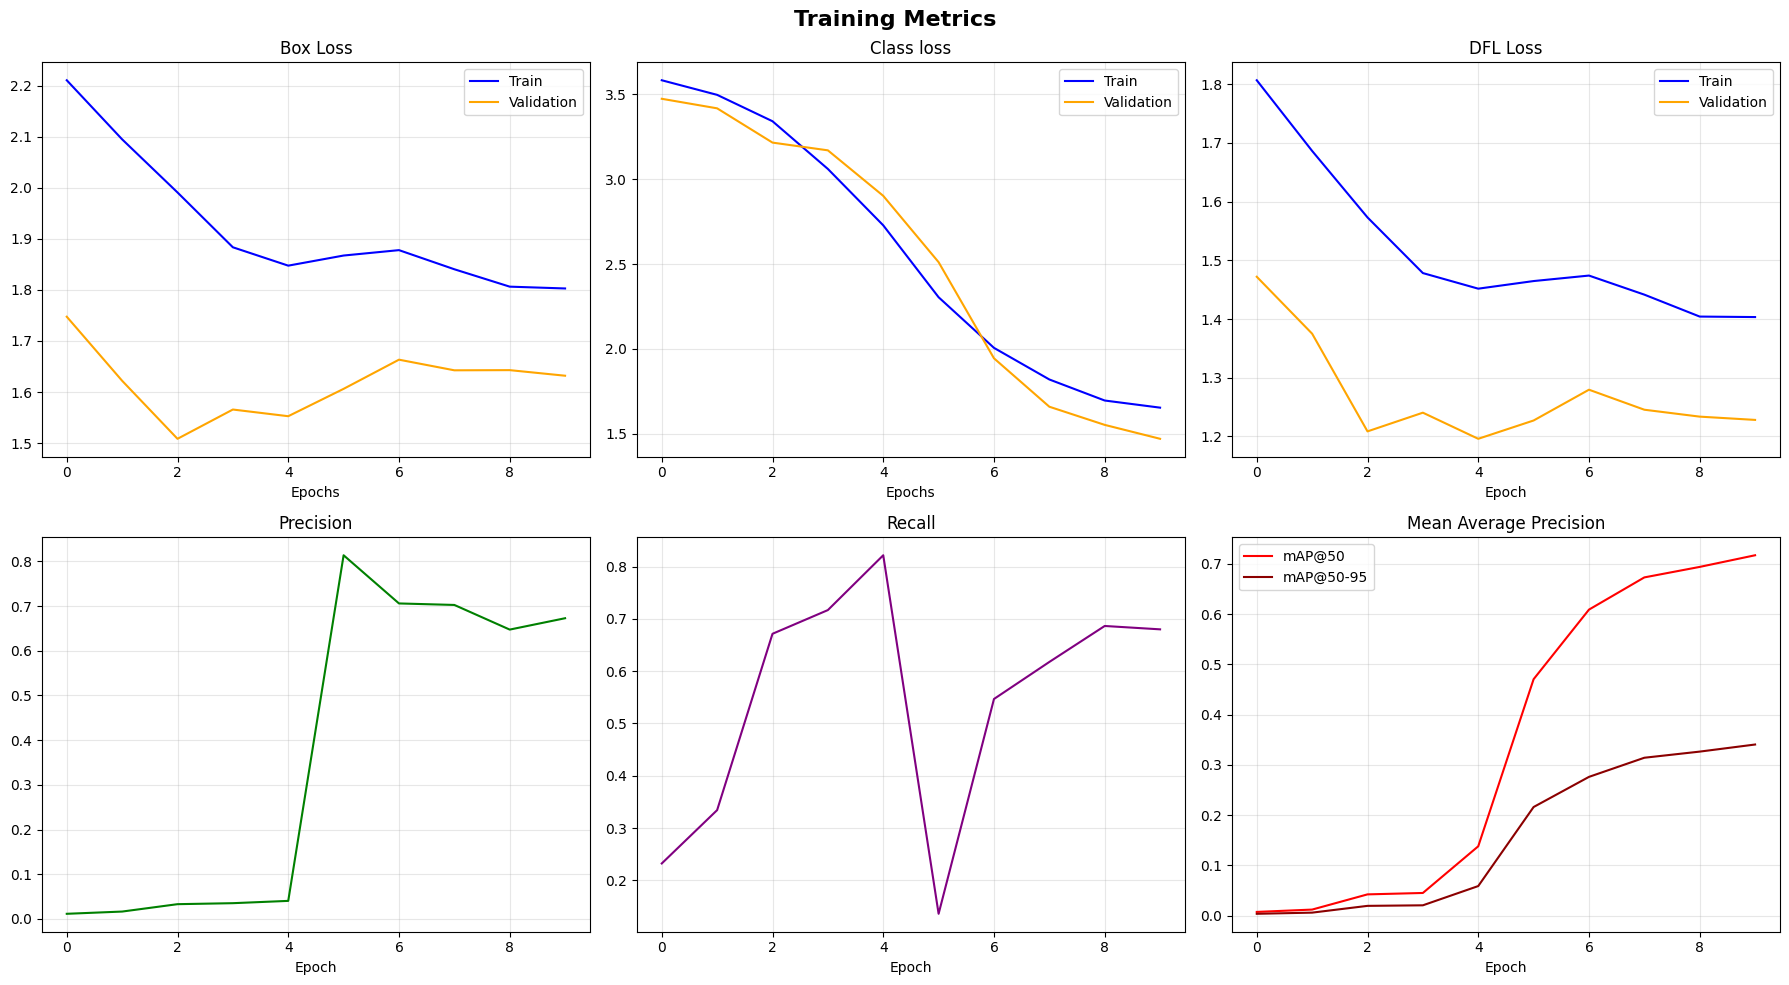


FINAL TRAINING METRICS
Precision: 0.673
Recall: 0.680
mAP@50: 0.717
mAP@50-95: 0.340


In [6]:
plot_train_results(result_dir='./Sperm_counting/yolov8n_training/')

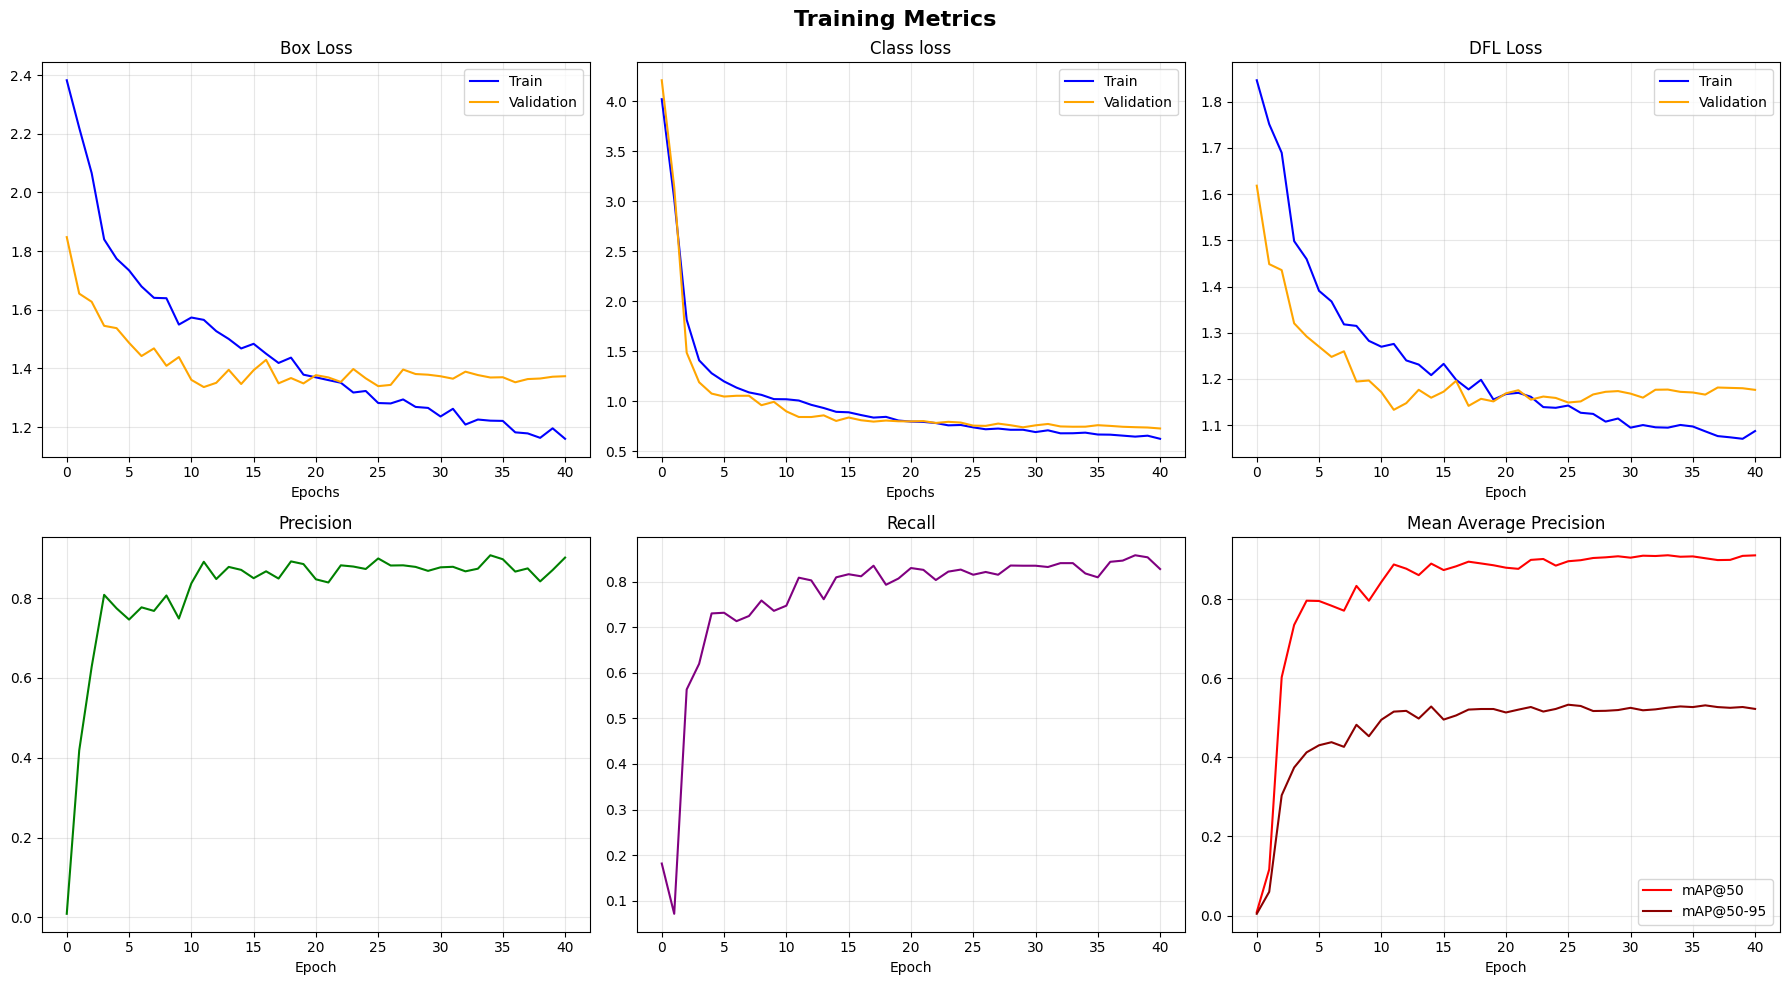


FINAL TRAINING METRICS
Precision: 0.901
Recall: 0.828
mAP@50: 0.911
mAP@50-95: 0.522


In [8]:
plot_train_results(result_dir='./Sperm_counting/yolov8m_training/')

In [16]:
def training_aug(dataset_path, epochs=50, img_size= 640, model_size= 'n',batch_size=16, aug=True):
    '''
    Train YOLOv8 model for Spirm counting
    Args:
    dataset_path: Path for dataset folder
    epochs : Number of training 
    img_size: Size og image
    model_size:  'n', 's', 'm', 'l', or 'x' (nano to xlarge)
    batch_size : Training batch size
    aug: use data augmentation
    '''
    data_yaml = Path(dataset_path)/'data.yaml'
    if not data_yaml.exists():
        print(f'❌ Error: data.yaml not found at {data_yaml}')
        return
    print('='*60)
    print("STARTING TRAINING")
    print('='*60)
    print(f'Model :YOLOv8{model_size}')
    print(f'Epochs: {epochs}')
    print(f'Image size {img_size}')
    print(f'Batch Size: {batch_size}')
    print(f'Device :{"GPU" if torch.cuda.is_available() else "CPU"} ')
    print('='*60)
    train_params = {
        'data': str(data_yaml),
        'epochs': epochs,
        'imgsz': img_size,
        'batch': batch_size,
        'patience': 20,              # Early stopping patience
        'save': True,
        'device': 0 if torch.cuda.is_available() else 'cpu',
        'project': 'Sperm_counting',
        'name': f'yolov8{model_size}_improved',
        'plots': True,
        'verbose': True,
        
        # Optimizer settings
        'optimizer': 'AdamW',        # Better optimizer
        'lr0': 0.001,                # Initial learning rate
        'lrf': 0.01,                 # Final learning rate
        'momentum': 0.937,
        'weight_decay': 0.0005,
        'warmup_epochs': 3.0,
        'cos_lr': True,              # Cosine learning rate scheduler
    }
    if aug:
        aug_param = {
            # Geometric augmentations
            'degrees': 10.0,         # Rotation (±10 degrees)
            'translate': 0.1,        # Translation (10% of image)
            'scale': 0.5,            # Scaling (50% range)
            'shear': 5.0,            # Shear (±5 degrees)
            'perspective': 0.0001,   # Perspective distortion
            'flipud': 0.5,           # Flip up-down (50% chance)
            'fliplr': 0.5,           # Flip left-right (50% chance)
            
            # Color augmentations
            'hsv_h': 0.015,          # Hue adjustment
            'hsv_s': 0.7,            # Saturation adjustment
            'hsv_v': 0.4,            # Value (brightness) adjustment
            
            # Mosaic & MixUp
            'mosaic': 1.0,           # Mosaic augmentation
            'mixup': 0.1,            # MixUp augmentation
            'copy_paste': 0.1,       # Copy-paste augmentation
        }
        train_params.update(aug_param)
        print("\n🎨 AUGMENTATION ENABLED:")
    
    model = YOLO(f'yolov8{model_size}.pt')
    results = model.train(**train_params)
    return model
    
    

In [18]:
training_aug(dataset_path='./Full-Sperm-Cell-Detection-6/', model_size='m')

STARTING TRAINING
Model :YOLOv8m
Epochs: 50
Image size 640
Batch Size: 16
Device :GPU 

🎨 AUGMENTATION ENABLED:
New https://pypi.org/project/ultralytics/8.4.9 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.5  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=Full-Sperm-Cell-Detection-6\data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ra

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

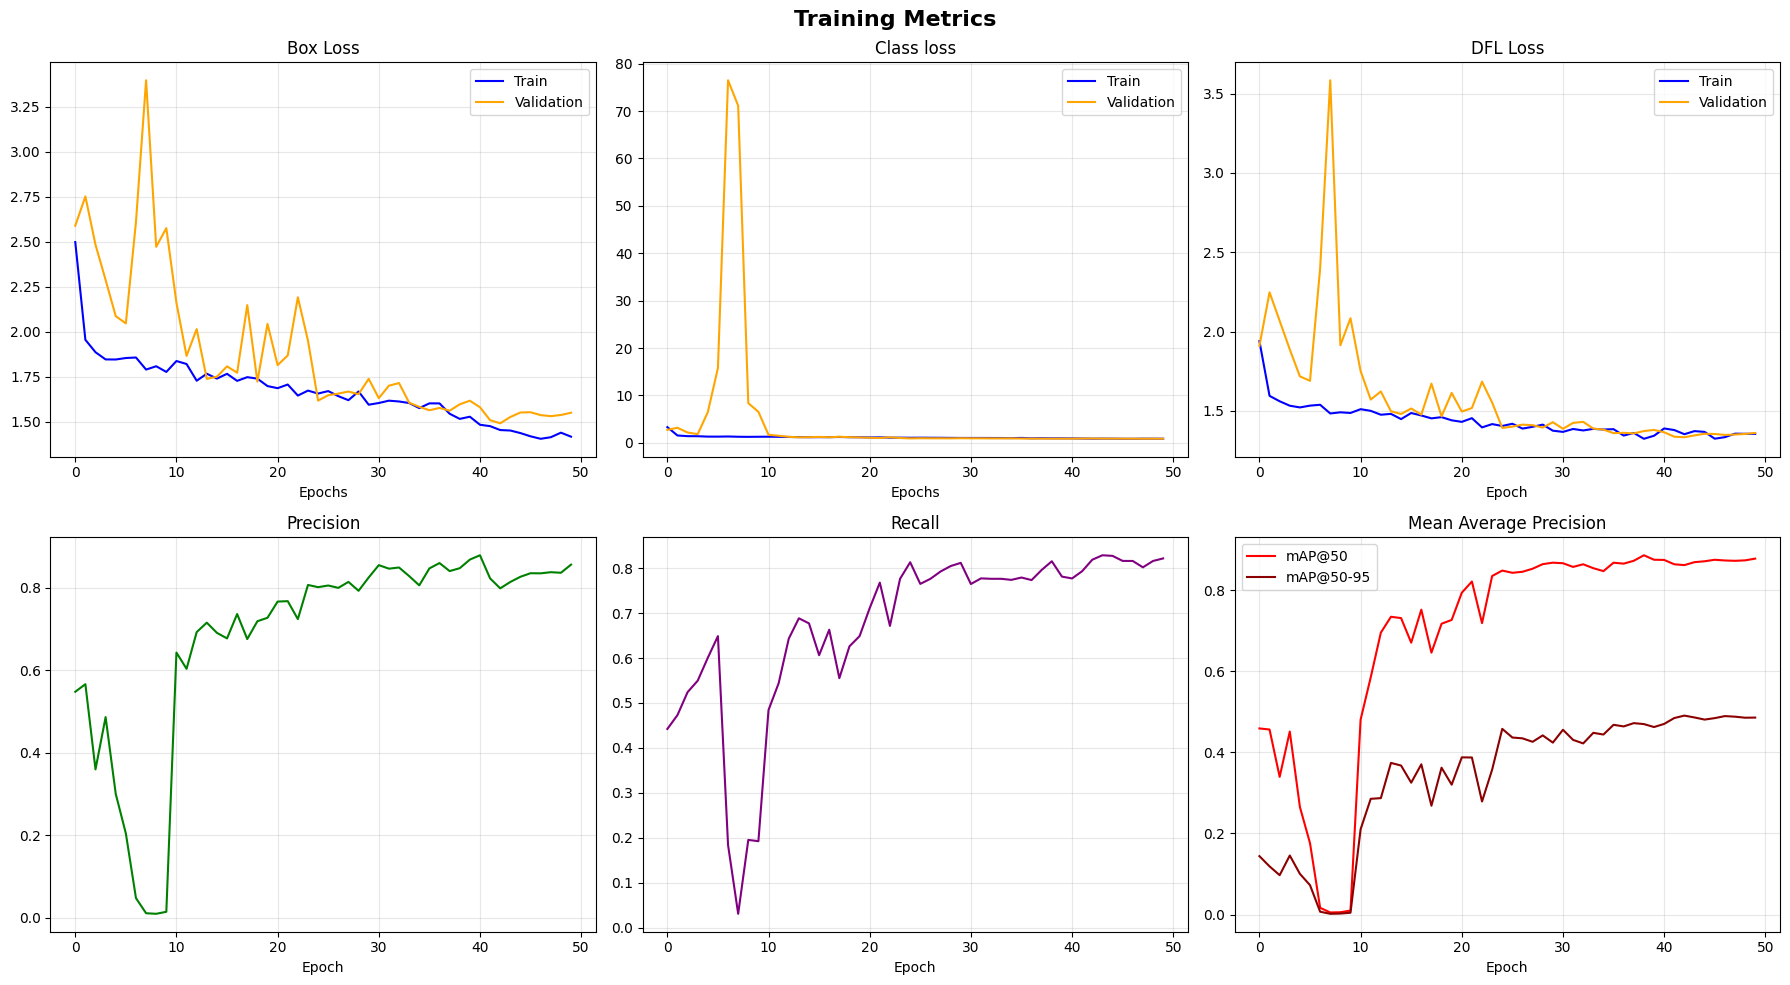


FINAL TRAINING METRICS
Precision: 0.856
Recall: 0.822
mAP@50: 0.878
mAP@50-95: 0.486


In [20]:
plot_train_results(result_dir='./Sperm_counting/yolov8m_improved/')

In [24]:
training_aug(dataset_path='./Full-Sperm-Cell-Detection-6/', model_size='m', aug=False)

STARTING TRAINING
Model :YOLOv8m
Epochs: 50
Image size 640
Batch Size: 16
Device :GPU 
New https://pypi.org/project/ultralytics/8.4.9 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.5  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=Full-Sperm-Cell-Detection-6\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

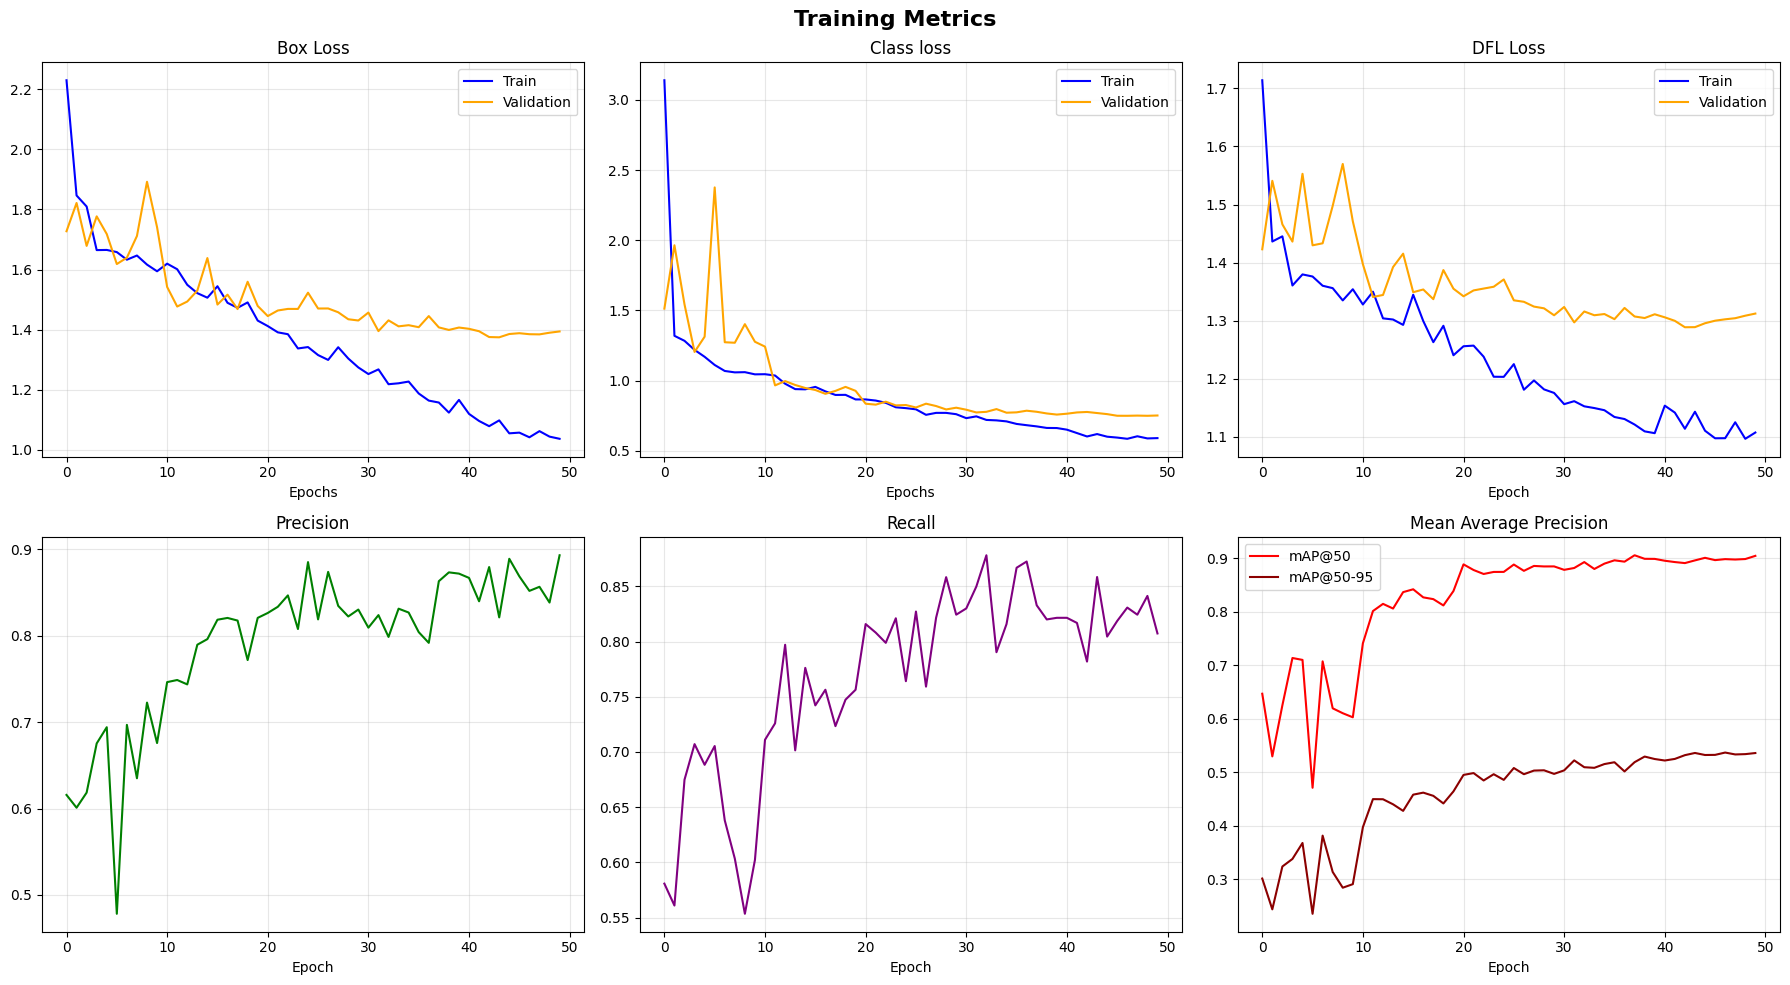


FINAL TRAINING METRICS
Precision: 0.893
Recall: 0.807
mAP@50: 0.905
mAP@50-95: 0.536


In [26]:
plot_train_results(result_dir='./Sperm_counting/yolov8m_improved2/')

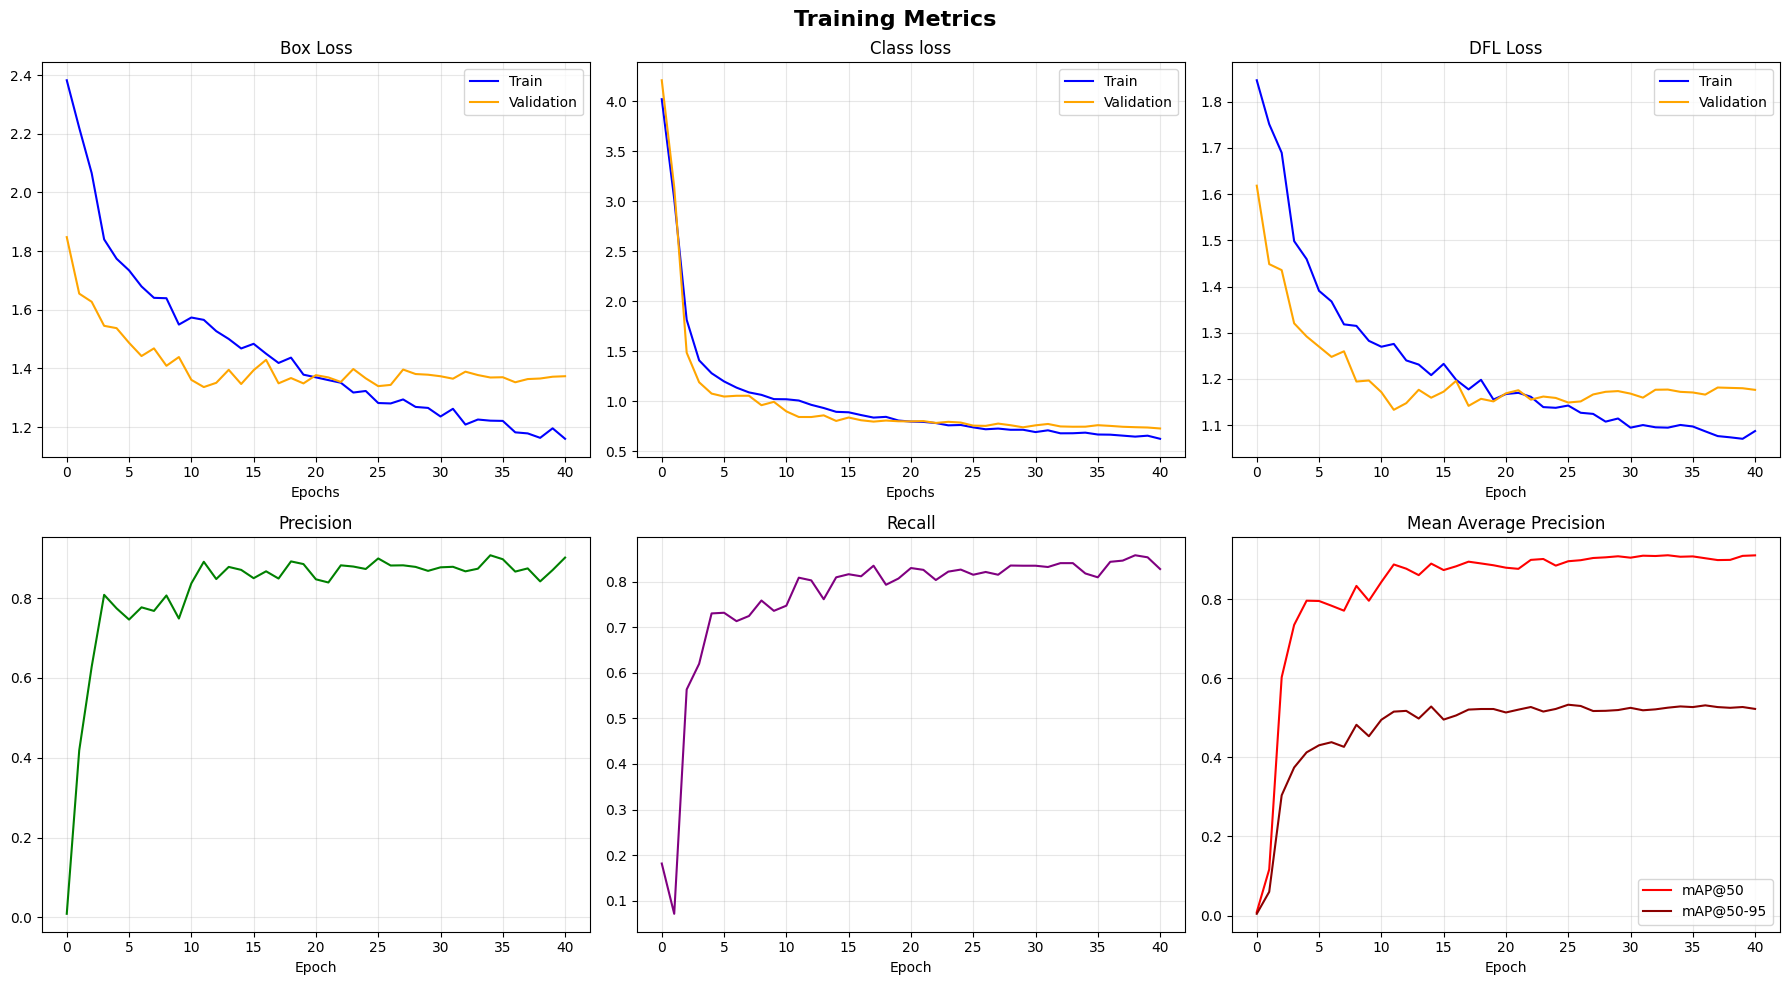


FINAL TRAINING METRICS
Precision: 0.901
Recall: 0.828
mAP@50: 0.911
mAP@50-95: 0.522


In [28]:
plot_train_results(result_dir='./Sperm_counting/yolov8m_training/')

In [30]:
MODEL_PATH = './Sperm_counting/yolov8m_training/weights/best.pt'
def load_model(model_path=MODEL_PATH):
    '''Load trained YOLO model'''
    if not Path(model_path).exists():
        print(f"❌ Model not found at {model_path}")
        print("Please train the model first or check the path")
        return None
    model = YOLO(model_path)
    print(f"✅ Model loaded from {model_path}")
    return model
    
        
    

In [42]:
def test_single_img(model, img_path, conf=0.25):
    '''Test model on a single image'''
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run the prediction 
    results = model.predict(source = img_path, conf= conf, verbose= False)[0]
    num_sperm = len(results.boxes)

    # plot results
    fig, axes = plt.subplots(1,2,figsize=(16,7))

    axes[0].imshow(img_rgb)
    axes[0].set_title('Original Image', fontsize=14)
    axes[0].axis('off')

    result_img = results.plot()
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    axes[1].imshow(result_img)
    axes[1].set_title(f'Detected: {num_sperm} Sperm Cells', fontsize=14, color='green')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
    
    print(f"✅ Total Sperm Detected: {num_sperm}")
    return results, num_sperm

In [38]:
model = load_model(MODEL_PATH)


✅ Model loaded from ./Sperm_counting/yolov8m_training/weights/best.pt


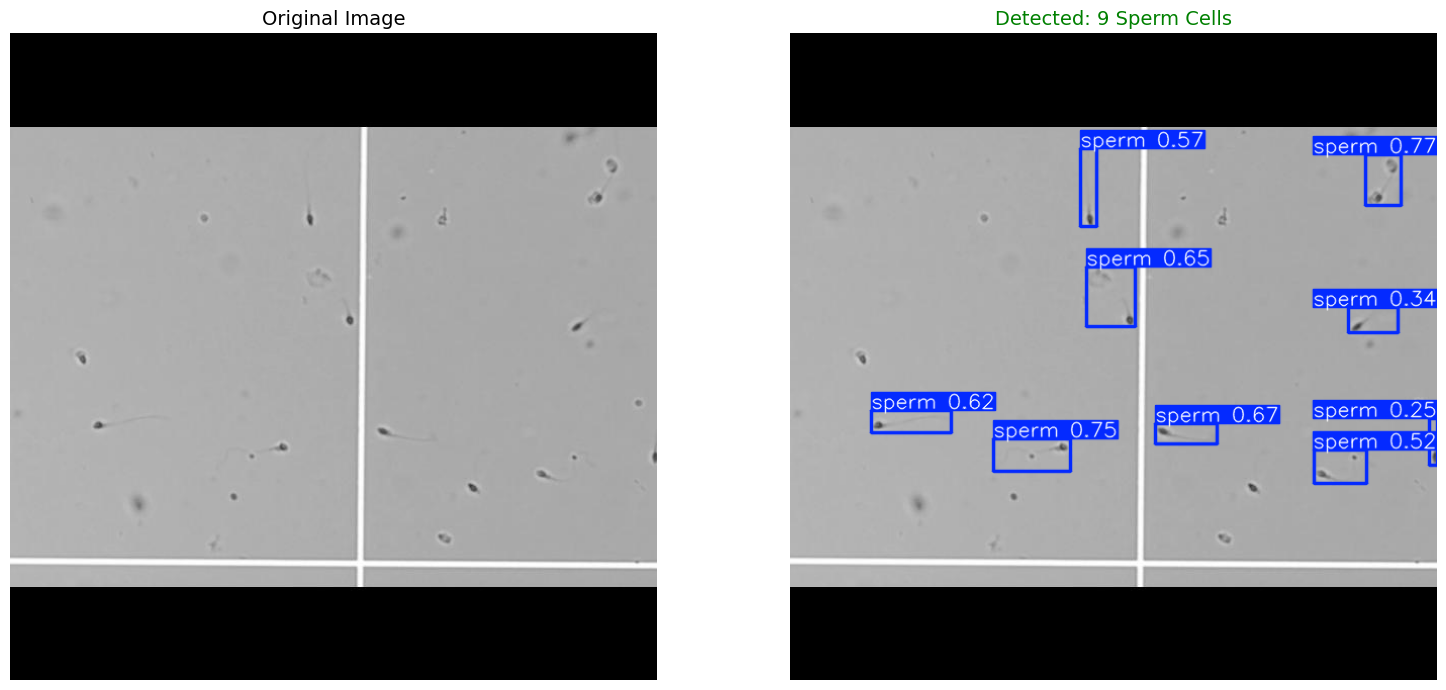

✅ Total Sperm Detected: 9


(ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'sperm'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
    

In [44]:
test_single_img(model, img_path='./Full-Sperm-Cell-Detection-6/test/images/EVA_glucose-10-mM_SM-187_002_tile_2_jpg.rf.3ccd5835d029ffe80a681c5ca390f025.jpg')

In [76]:
def analyze_imgs(model, test_folder, conf=0.25):
    '''Analyze multiple images and create summary report'''
    images = list(Path(test_folder).glob('*.jpg'))
    results_list = []
    print(f"📊 Analyzing {len(images)} images...\n")

    for img_path in images:
        results = model.predict(source= img_path, conf= conf, verbose=False)[0]
        # Read image for dimensions
        img = cv2.imread(str(img_path))
        height, width = img.shape[:2]
        area = height * width
        num_sperm = len(results.boxes)
        denisty = (num_sperm/area)*1000
        results_list.append({
            'image':img_path.name,
            'count':num_sperm,
            'density':denisty,
            'width':width,
            'height':height
        })
        print(f"✓ {img_path.name}: {num_sperm} sperm | Density: {denisty:.2f}")
    df= pd.DataFrame(results_list)
    
    # Summary statistics
    print("\n" + "="*60)
    print("📈 SUMMARY STATISTICS")
    print("="*60)
    print(f"Total Images Analyzed: {len(df)}")
    print(f"Average Sperm Count: {df['count'].mean():.1f}")
    print(f"Average Density: {df['density'].mean():.3f} sperm/1000px²")
    print(f"Min Count: {df['count'].min()} | Max Count: {df['count'].max()}")
    print("="*60)
    
    return df

In [78]:
analyze_imgs(model, test_folder='./Full-Sperm-Cell-Detection-6/test/images/')

📊 Analyzing 11 images...

✓ EVA_glucose-10-mM_SM-187_002_tile_2_jpg.rf.3ccd5835d029ffe80a681c5ca390f025.jpg: 9 sperm | Density: 0.02
✓ EVA_nao-cap_SM-191_007_tile_1_jpg.rf.cc129b4896f9ba38bd60fb1b815476c8.jpg: 5 sperm | Density: 0.01
✓ EVA_T0_SM-187001_tile_2_jpg.rf.c72dfdc1c024d749b3aef24afc730840.jpg: 17 sperm | Density: 0.04
✓ EVA_T0_SM-188_tile_3_jpg.rf.a47c86b3c6044afdc3d7f3b68e0c0e1b.jpg: 27 sperm | Density: 0.07
✓ IARA_T1_CEIE86_003_tile_2_jpg.rf.fc992589440746e325417cfa9e4f3244.jpg: 21 sperm | Density: 0.05
✓ IARA_T1_CEIE86_003_tile_4_jpg.rf.aef01641cafca2a6a0426ed8345734ee.jpg: 33 sperm | Density: 0.08
✓ IARA_T2_5_CEIE83_PCOS_001_tile_4_jpg.rf.cc6f50660ad4bcd2683392c15dbccd1a.jpg: 21 sperm | Density: 0.05
✓ IARA_T2_5_CEIE85_PCOS_003_tile_4_jpg.rf.508c663f52d323cf0c4b9bc091bc6d2e.jpg: 23 sperm | Density: 0.06
✓ IARA_T2_5_SM-86_PCOS_003_tile_3_jpg.rf.cc3d9bdd6779fa0199d39046da94a5fb.jpg: 26 sperm | Density: 0.06
✓ SARA_101_tile_3_jpg.rf.5def8a60bae3660bb28851ac1f846a77.jpg: 8 sp

,image,count,density,width,height
0,EVA_glucose-10-mM_SM-187_002_tile_2_jpg.rf.3cc...,9,0.021973,640,640
1,EVA_nao-cap_SM-191_007_tile_1_jpg.rf.cc129b489...,5,0.012207,640,640
2,EVA_T0_SM-187001_tile_2_jpg.rf.c72dfdc1c024d74...,17,0.041504,640,640
3,EVA_T0_SM-188_tile_3_jpg.rf.a47c86b3c6044afdc3...,27,0.065918,640,640
4,IARA_T1_CEIE86_003_tile_2_jpg.rf.fc99258944074...,21,0.051270,640,640
5,IARA_T1_CEIE86_003_tile_4_jpg.rf.aef01641cafca...,33,0.080566,640,640
6,IARA_T2_5_CEIE83_PCOS_001_tile_4_jpg.rf.cc6f50...,21,0.051270,640,640
7,IARA_T2_5_CEIE85_PCOS_003_tile_4_jpg.rf.508c66...,23,0.056152,640,640
8,IARA_T2_5_SM-86_PCOS_003_tile_3_jpg.rf.cc3d9bd...,26,0.063477,640,640
9,SARA_101_tile_3_jpg.rf.5def8a60bae3660bb28851a...,8,0.019531,640,640


In [110]:
def predict_on_video(model, video_path, output_path = 'output_video.mp4',conf=0.25):
    """
    Process video and detect sperm in each frame
    
    Args:
        model: YOLO model
        video_path: Path to input video
        output_path: Path to save output video
        conf: Confidence threshold
    """
    cap = cv2.VideoCapture(video_path)
    
    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    #Video writer
    fourr = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path,fourr, fps, (width, height))
    print("="*60)
    print("🎬 VIDEO PROCESSING STARTED")
    print("="*60)
    print(f"Input: {video_path}")
    print(f"Output: {output_path}")
    print(f"Resolution: {width}x{height}")
    print(f"FPS: {fps}")
    print(f"Total Frames: {total_frames}")
    print("="*60)
    frame_count =0 
    total_sperm_detected = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret :
            break
        results = model.predict(source= frame, conf=conf, verbose= False)[0]
        num_sperm = len(results.boxes)
        total_sperm_detected.append(num_sperm)
        
        # Get annotated frame
        annotated_frame = results.plot()
        text = f"Frame {frame_count}/{total_frames} |sperm : {num_sperm}"
        cv2.putText(annotated_frame, text, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),2)
        out.write(annotated_frame)

        frame_count +=1
        # Progress update every 30 frames
        if frame_count % 30 == 0:
            progress = (frame_count / total_frames) * 100
            print(f"Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")
    # Release everything
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    
    # Final statistics
    print("\n" + "="*60)
    print("✅ VIDEO PROCESSING COMPLETE!")
    print("="*60)
    print(f"Total Frames Processed: {frame_count}")
    print(f"Average Sperm per Frame: {np.mean(total_sperm_detected):.1f}")
    print(f"Max Sperm in Frame: {max(total_sperm_detected)}")
    print(f"Min Sperm in Frame: {min(total_sperm_detected)}")
    print(f"Output saved to: {output_path}")
    print("="*60)
        
        
    

In [90]:
def analyze_video_results(sperm_counts):
    """Visualize sperm counts over video frames"""
    
    plt.figure(figsize=(14, 5))
    
    # Plot 1: Count over time
    plt.subplot(1, 2, 1)
    plt.plot(sperm_counts, linewidth=2, color='blue')
    plt.xlabel('Frame Number', fontsize=12)
    plt.ylabel('Sperm Count', fontsize=12)
    plt.title('Sperm Count Over Video Frames', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Distribution
    plt.subplot(1, 2, 2)
    plt.hist(sperm_counts, bins=20, color='green', alpha=0.7, edgecolor='black')
    plt.xlabel('Sperm Count', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Sperm Counts', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Use after processing video
# analyze_video_results(video_counts)

In [92]:
def save_results_to_csv(results_dict, filename='sperm_analysis_results.csv'):
    """Save analysis results to CSV file"""
    df = pd.DataFrame([results_dict])
    df.to_csv(filename, index=False)
    print(f"💾 Results saved to: {filename}")
    return df

# Example usage
# save_results_to_csv(stats, 'my_results.csv')

In [112]:
predict_on_video(model, video_path='./Full-Sperm-Cell-Detection-6/Video .mp4', )

🎬 VIDEO PROCESSING STARTED
Input: ./Full-Sperm-Cell-Detection-6/Video .mp4
Output: output_video.mp4
Resolution: 576x1024
FPS: 29
Total Frames: 499
Progress: 6.0% (30/499 frames)
Progress: 12.0% (60/499 frames)
Progress: 18.0% (90/499 frames)
Progress: 24.0% (120/499 frames)
Progress: 30.1% (150/499 frames)
Progress: 36.1% (180/499 frames)
Progress: 42.1% (210/499 frames)
Progress: 48.1% (240/499 frames)
Progress: 54.1% (270/499 frames)
Progress: 60.1% (300/499 frames)
Progress: 66.1% (330/499 frames)
Progress: 72.1% (360/499 frames)
Progress: 78.2% (390/499 frames)
Progress: 84.2% (420/499 frames)
Progress: 90.2% (450/499 frames)
Progress: 96.2% (480/499 frames)

✅ VIDEO PROCESSING COMPLETE!
Total Frames Processed: 499
Average Sperm per Frame: 7.6
Max Sperm in Frame: 25
Min Sperm in Frame: 0
Output saved to: output_video.mp4


In [114]:
folder_path = './'
directories = [d for d in os.listdir(folder_path) 
               if os.path.isdir(os.path.join(folder_path, d))]

In [116]:
directories

['.ipynb_checkpoints', 'Full-Sperm-Cell-Detection-6', 'Sperm_counting']

In [118]:
import os
from pathlib import Path

def quick_folder_map(folder_path):
    """Quick mapping - print to console only"""
    
    folder = Path(folder_path)
    
    def print_tree(directory, prefix=""):
        items = sorted(directory.iterdir(), key=lambda x: (not x.is_dir(), x.name))
        items = [i for i in items if i.name not in ['.ipynb_checkpoints', '__pycache__', '.git']]
        
        for i, item in enumerate(items):
            is_last = i == len(items) - 1
            current = "└── " if is_last else "├── "
            extension = "    " if is_last else "│   "
            
            icon = "📁" if item.is_dir() else "📄"
            print(f"{prefix}{current}{icon} {item.name}")
            
            if item.is_dir():
                print_tree(item, prefix + extension)
    
    print(f"📁 {folder.name}/")
    print_tree(folder)

# Usage
folder_path = './'
quick_folder_map(folder_path)

📁 /
├── 📁 Full-Sperm-Cell-Detection-6
│   ├── 📁 test
│   │   ├── 📁 images
│   │   │   ├── 📄 EVA_T0_SM-187001_tile_2_jpg.rf.c72dfdc1c024d749b3aef24afc730840.jpg
│   │   │   ├── 📄 EVA_T0_SM-188_tile_3_jpg.rf.a47c86b3c6044afdc3d7f3b68e0c0e1b.jpg
│   │   │   ├── 📄 EVA_glucose-10-mM_SM-187_002_tile_2_jpg.rf.3ccd5835d029ffe80a681c5ca390f025.jpg
│   │   │   ├── 📄 EVA_nao-cap_SM-191_007_tile_1_jpg.rf.cc129b4896f9ba38bd60fb1b815476c8.jpg
│   │   │   ├── 📄 IARA_T1_CEIE86_003_tile_2_jpg.rf.fc992589440746e325417cfa9e4f3244.jpg
│   │   │   ├── 📄 IARA_T1_CEIE86_003_tile_4_jpg.rf.aef01641cafca2a6a0426ed8345734ee.jpg
│   │   │   ├── 📄 IARA_T2_5_CEIE83_PCOS_001_tile_4_jpg.rf.cc6f50660ad4bcd2683392c15dbccd1a.jpg
│   │   │   ├── 📄 IARA_T2_5_CEIE85_PCOS_003_tile_4_jpg.rf.508c663f52d323cf0c4b9bc091bc6d2e.jpg
│   │   │   ├── 📄 IARA_T2_5_SM-86_PCOS_003_tile_3_jpg.rf.cc3d9bdd6779fa0199d39046da94a5fb.jpg
│   │   │   ├── 📄 SARA_101_tile_3_jpg.rf.5def8a60bae3660bb28851ac1f846a77.jpg
│   │   │   └── 📄 SARA_104_ti